# Exercise 02

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

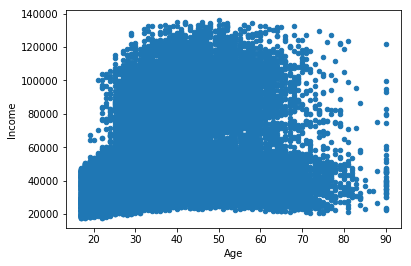

In [3]:
income.plot(x='Age', y='Income', kind='scatter') #Relación entre edad e ingreso

In [4]:
x=income[['Age']].values
x

array([[39],
       [50],
       [38],
       ..., 
       [58],
       [22],
       [52]], dtype=int64)

In [5]:
y=income[['Income']].values
y

array([[ 51806.],
       [ 68719.],
       [ 51255.],
       ..., 
       [ 26801.],
       [ 44644.],
       [ 69359.]])

In [6]:
#Regresión Lineal

from sklearn.linear_model import LinearRegression

linreg=LinearRegression(fit_intercept=True)

linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
linreg.coef_ ,linreg.intercept_
#La regresión queda expresada como yest=32538.0813087+542.16765707x + ei

#Bajo esta ecuación para un aumento del uno por ciento de la edad los ingresos se ven afectados
#en la pendiente multiplicada por la x por un uno por ciento

#Diferencia=

#para el caso general (linreg.coef_)*(x)*(0,01)#

(array([[ 542.16765707]]), array([ 32538.08813087]))

In [8]:
x1=30
z_pred1 = linreg.predict(x1)
z_pred1

x2=30.3
z_pred2 = linreg.predict(x2)
z_pred2

dif1=z_pred2-z_pred1
dif1

#Para este caso se determina la diferencia como 542.16765707*30*0,01=162.65029712
#Que es la diferencia si se aumenta en un uno pr ciento la edad


array([[ 162.65029712]])

In [9]:
#Predicciones Completas

y_pred = linreg.predict(x)
y_pred

array([[ 53682.62675669],
       [ 59646.47098449],
       [ 53140.45909962],
       ..., 
       [ 63983.81224107],
       [ 44465.77658646],
       [ 60730.80629863]])

In [10]:
x3=30
z_pred = linreg.predict(x3)
z_pred

# La predicción para x=30 es 48803.11784304

array([[ 48803.11784304]])

In [11]:
x4=40
z_pred = linreg.predict(x4)
z_pred
# La predicción para x=40 es 54224.79441376

array([[ 54224.79441376]])

# Exercise 2.2
Evaluate the model using the MSE

In [12]:
print("Residual sum of squares: %.2f"
 % np.mean((y - linreg.predict(x)) ** 2))

Residual sum of squares: 593783043.84



# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [13]:
# import
from sklearn.linear_model import LinearRegression

In [14]:
# Initialize
linreg = LinearRegression(fit_intercept=True)

In [15]:
# Fit
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
linreg.coef_

array([[ 542.16765707]])

In [17]:
linreg.intercept_

array([ 32538.08813087])

# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [18]:
x5=income[['Age','Education-Num','Hours per week']].values
x5

array([[39, 13, 40],
       [50, 13, 13],
       [38,  9, 40],
       ..., 
       [58,  9, 40],
       [22,  9, 20],
       [52,  9, 40]], dtype=int64)

In [19]:
y1=income[['Income']].values
y1

array([[ 51806.],
       [ 68719.],
       [ 51255.],
       ..., 
       [ 26801.],
       [ 44644.],
       [ 69359.]])

In [20]:
#Regresión Lineal con más variables para estimar

from sklearn.linear_model import LinearRegression

linreg=LinearRegression(fit_intercept=True)

linreg.fit(x5,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
linreg.coef_ ,linreg.intercept_

(array([[  488.83236742,  3863.94024591,   429.23953404]]),
 array([-21712.64588125]))

In [22]:
y1_pred = linreg.predict(x5)
y1_pred

array([[ 64752.62100678],
       [ 58540.30962936],
       [ 48808.0276557 ],
       ..., 
       [ 58584.67500419],
       [ 32401.91909611],
       [ 55651.68079964]])

# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

In [31]:
income['isUS'] = (income['Country'] == 'United-States')*1.0
income['isUS'].value_counts()

1.0    29170
0.0     3391
Name: isUS, dtype: int64

In [32]:
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,isUS
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,1.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,0.0


Se usa la variable iUS para la regresión

In [70]:
income.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Income,isUS,isUS_pred_class
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.0
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,53455.809158,0.895857,1.0
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,25465.530461,0.305451,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,17636.000000,0.000000,1.0
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,35503.000000,1.000000,1.0
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,44978.000000,1.000000,1.0
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,63548.000000,1.000000,1.0
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,136063.000000,1.000000,1.0


# Crear variables categoricas

In [105]:
Race_dummies = pd.get_dummies(income.Race, prefix='Race')
Race_dummies.drop(Race_dummies.columns[0], axis=1, inplace=True)
Race_dummies

,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
5,0,0,0,1
6,0,1,0,0
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [106]:
# se concatena la variable categorica
income = pd.concat([income, Race_dummies], axis=1)

In [107]:
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,...,Capital Loss,Hours per week,Country,Income,isUS,isUS_pred_class,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,51806.0,1.0,1.0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,68719.0,1.0,1.0,0,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,51255.0,1.0,1.0,0,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,47398.0,1.0,1.0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,30493.0,0.0,1.0,0,1,0,0


In [109]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['Age','Income','fnlwgt','Education-Num','Capital Gain','Hours per week', 'Race_Black',
               'Race_Other',
              'Race_White'
               ]
X = income[feature_cols]
y = income.isUS

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)


#logreg.fit(X, y)
#income['isUS_pred_class'] = logreg.predict(X)

In [110]:
res = logreg.fit(X_train, y_train)
res

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [111]:
X.head()

,Age,Income,fnlwgt,Education-Num,Capital Gain,Hours per week,Race_Black,Race_Other,Race_White
0,39,51806.0,77516,13,2174,40,0,0,1
1,50,68719.0,83311,13,0,13,0,0,1
2,38,51255.0,215646,9,0,40,0,0,1
3,53,47398.0,234721,7,0,40,1,0,0
4,28,30493.0,338409,13,0,40,1,0,0


In [112]:
X.describe()

,Age,Income,fnlwgt,Education-Num,Capital Gain,Hours per week,Race_Black,Race_Other,Race_White
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,53455.809158,1.897784e+05,10.080679,1077.648844,40.437456,0.095943,0.008323,0.854274
std,13.640433,25465.530461,1.055500e+05,2.572720,7385.292085,12.347429,0.294518,0.090851,0.352837
min,17.000000,17636.000000,1.228500e+04,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,35503.000000,1.178270e+05,9.000000,0.000000,40.000000,0.000000,0.000000,1.000000
50%,37.000000,44978.000000,1.783560e+05,10.000000,0.000000,40.000000,0.000000,0.000000,1.000000
75%,48.000000,63548.000000,2.370510e+05,12.000000,0.000000,45.000000,0.000000,0.000000,1.000000
max,90.000000,136063.000000,1.484705e+06,16.000000,99999.000000,99.000000,1.000000,1.000000,1.000000


In [113]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: isUS, dtype: float64

In [115]:
### NATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)


array([[   0,  850],
       [   0, 7291]], dtype=int64)

In [116]:
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       850
        1.0       0.90      1.00      0.94      7291

avg / total       0.80      0.90      0.85      8141



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## CURVA ROC DEL MODELO

In [117]:
#PREDICE SI ES DE ESTADOS UNIDOS O NO
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([ 0.89972848,  0.80813594,  0.90185696, ...,  0.83000118,
        0.84942976,  0.82349762])

In [118]:
# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.895590222331


Text(0,0.5,'True Positive Rate (Sensitivity)')

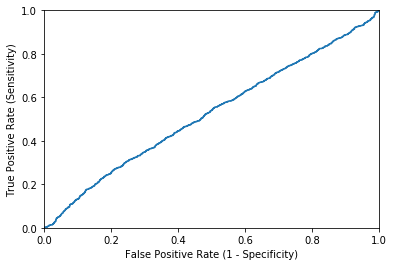

In [119]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [120]:
## CALCULO DEL AUC

# calculate AUC
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.523566685761


## Se realizan varias pruebas del modelo

In [121]:
res=[]
for i in range(50):
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3*i)

    # train a logistic regression model
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train, y_train)

    # make predictions for testing set
    y_pred_class = logreg.predict(X_test)

    # calculate testing accuracy
    res.append(metrics.accuracy_score(y_test, y_pred_class))

In [97]:
pd.Series(res).describe()

count    50.000000
mean      0.895489
std       0.002605
min       0.890185
25%       0.893871
50%       0.895836
75%       0.897248
max       0.901978
dtype: float64

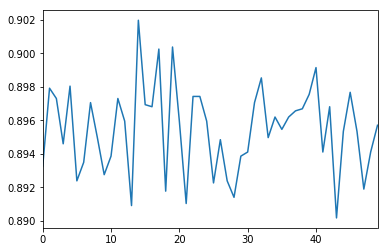

In [98]:
pd.Series(res).plot()
## Se observa que el performance del modelo  tiene mucha varianza

In [92]:
###+ USANDO K FOLDS

from sklearn.cross_validation import KFold

# Create k-folds
kf = KFold(X.shape[0], n_folds=10, random_state=0)

results = []

for train_index, test_index in kf:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train a logistic regression model
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train, y_train)

    # make predictions for testing set
    y_pred_class = logreg.predict(X_test)

    # calculate testing accuracy
    results.append(metrics.accuracy_score(y_test, y_pred_class))

In [100]:
pd.Series(results).describe()

count    10.000000
mean      0.895857
std       0.000087
min       0.895609
25%       0.895885
50%       0.895885
75%       0.895885
max       0.895885
dtype: float64

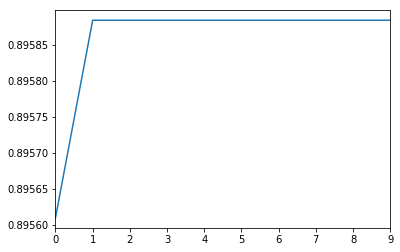

In [101]:
## GRAFICA USANDO K FOLS

pd.Series(results).plot()

In [102]:
from sklearn.cross_validation import cross_val_score

logreg = LogisticRegression(C=1e9)

results = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')

In [103]:
pd.Series(results).describe()

count    10.000000
mean      0.895857
std       0.000087
min       0.895609
25%       0.895885
50%       0.895885
75%       0.895885
max       0.895885
dtype: float64

## PERFORMANCE DEL MODELO

Se concluye que el perfo¿rmance del modelo se acerca a 0.89

In [ ]:
##